In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
df_churn=pd.read_csv('E:/churn_company.csv')
df_churn

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

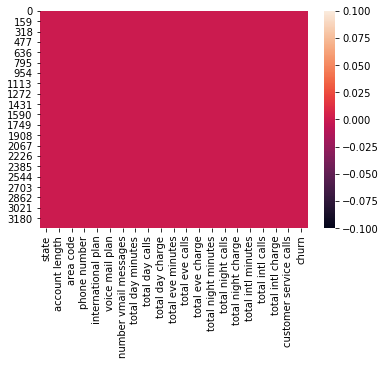

In [11]:
#checking for any missing data
sns.heatmap(df_churn.isnull())

In [12]:
df_churn.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [13]:
#checking data types
df_churn.dtypes
#We can see the attributes are in numerical and categorical form

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [14]:
#checking the basic info about the attributes and their counts
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [15]:
#checking the maximum and minimum values of each attribute and their percentiles
df_churn.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

# Univariate Analysis

In [17]:
df_churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

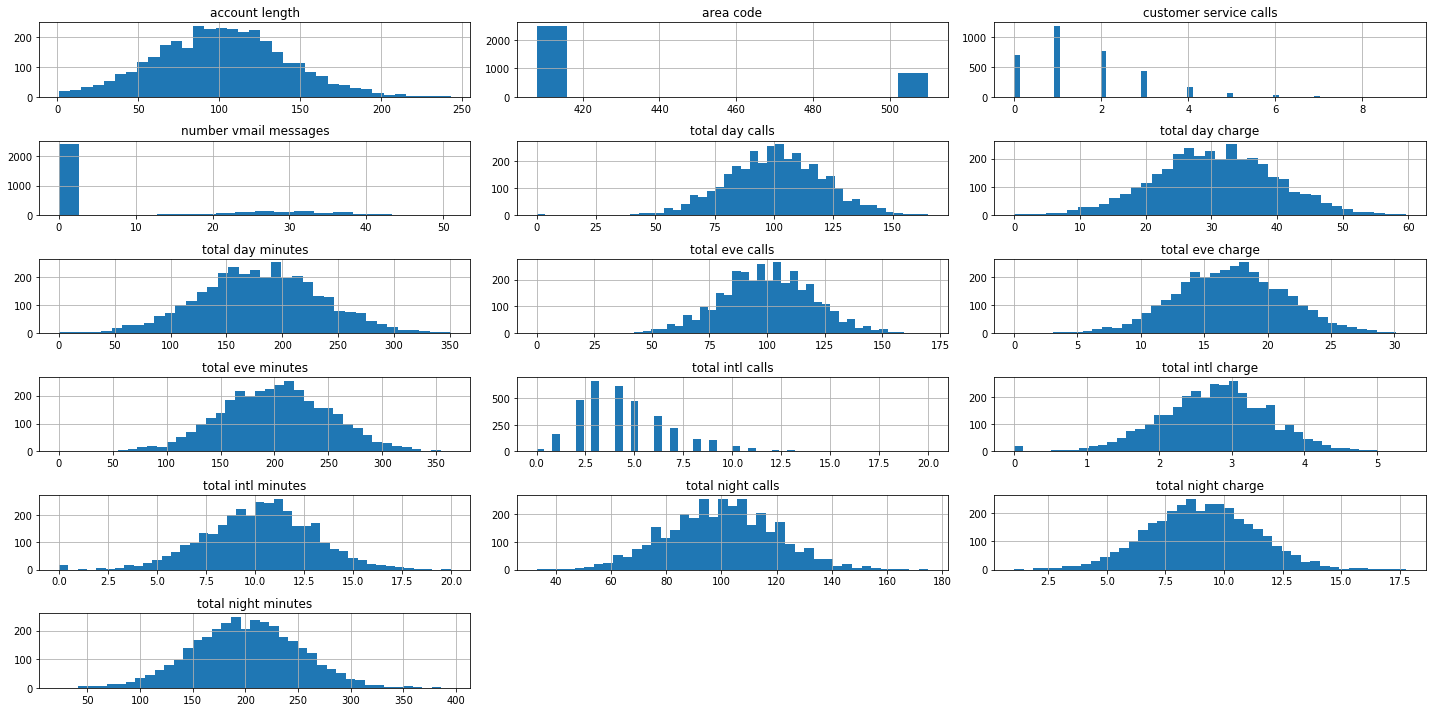

In [19]:
df_churn[['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']].hist(figsize = (20,10), layout=(6, 3), bins = 'auto')
plt.tight_layout()
plt.show()

In [20]:
df_churn.drop(['area code', 'phone number'],axis=1,inplace=True)
#not necessary for the models

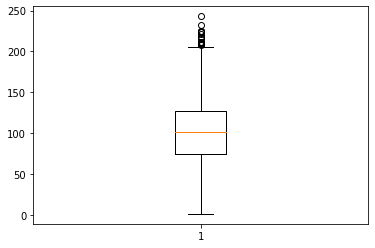

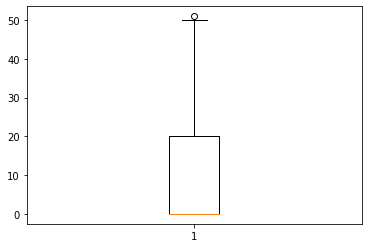

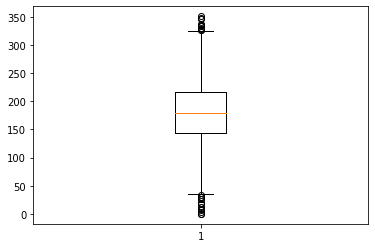

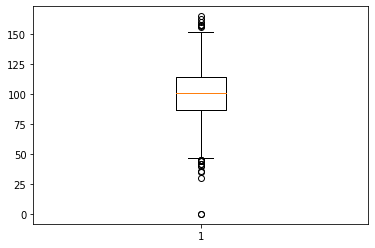

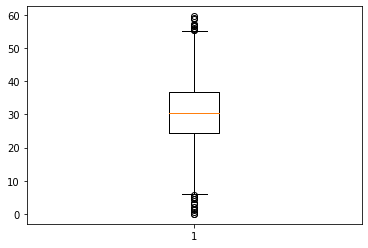

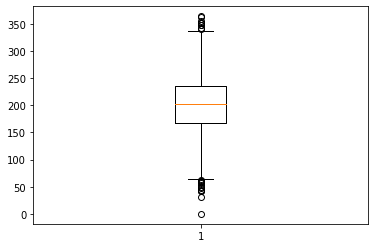

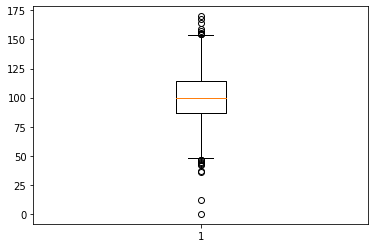

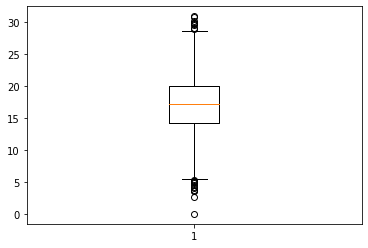

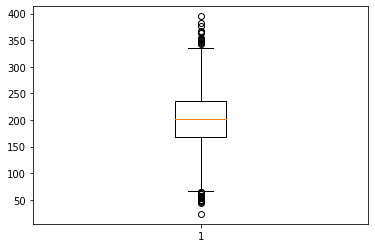

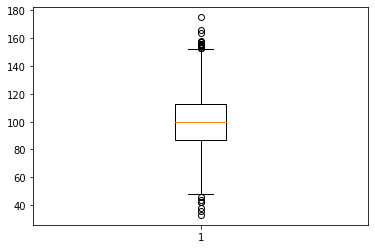

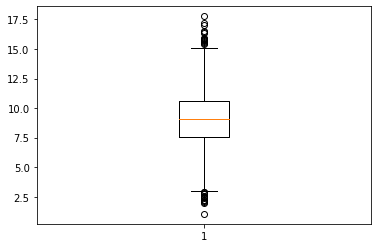

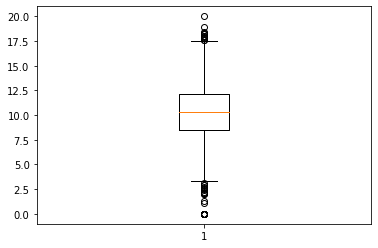

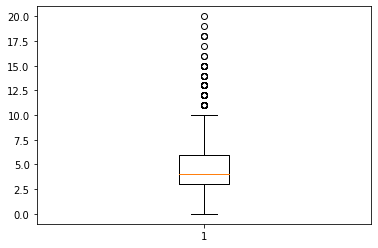

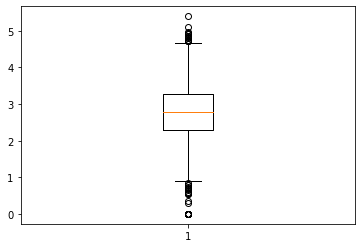

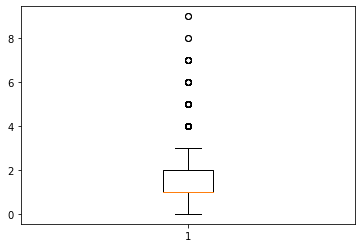

In [22]:
for i in  ['account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'] :
    plt.boxplot(df_churn[i])
    plt.show()

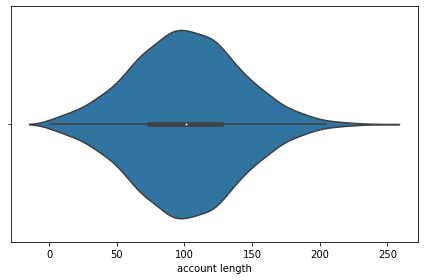

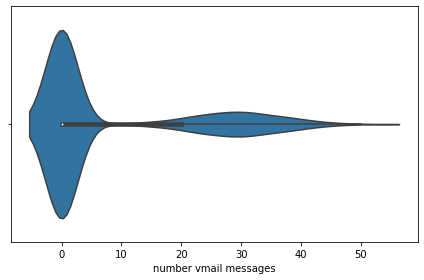

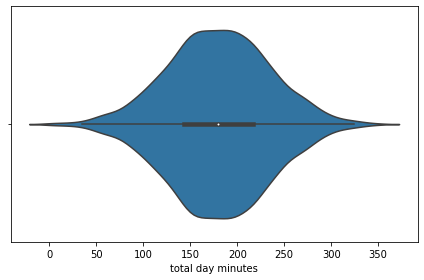

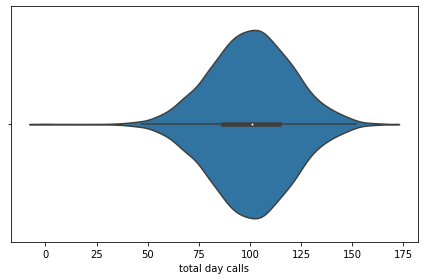

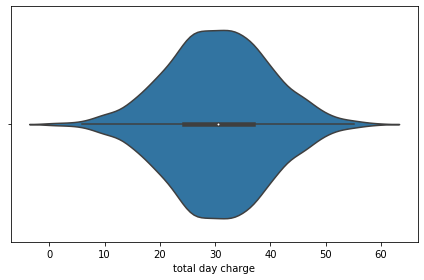

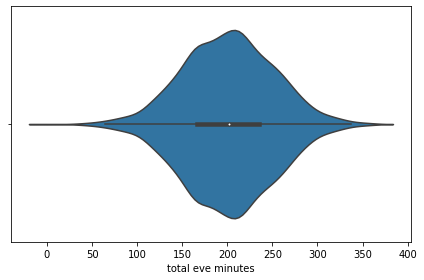

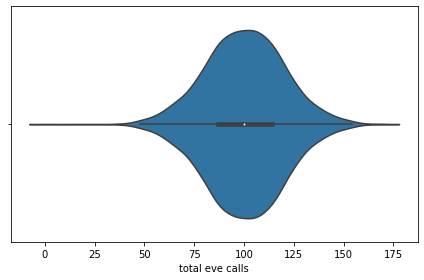

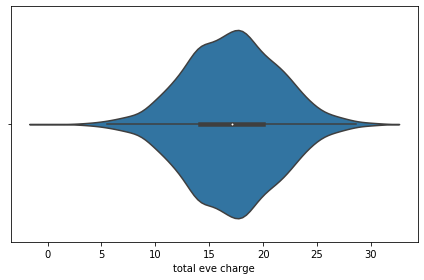

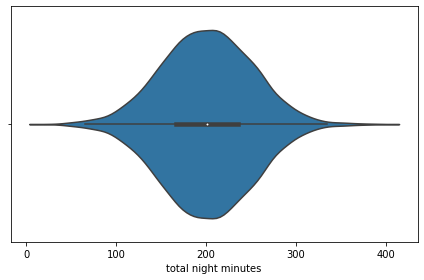

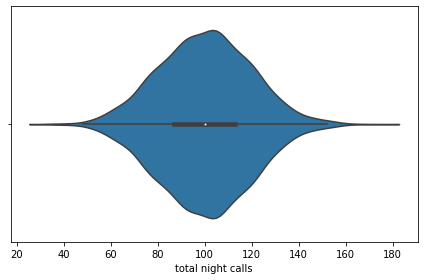

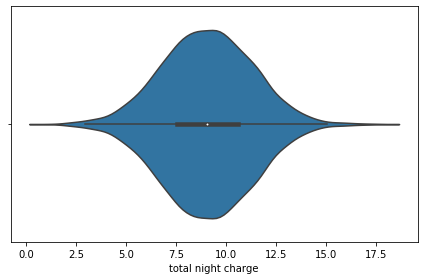

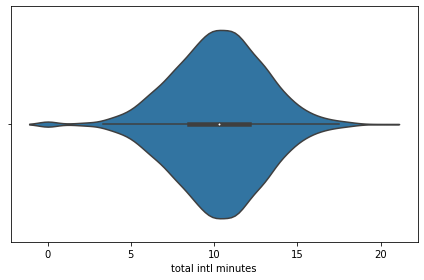

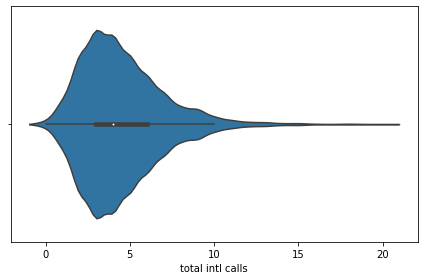

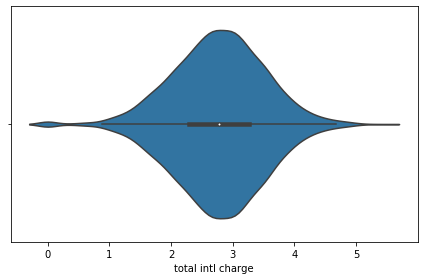

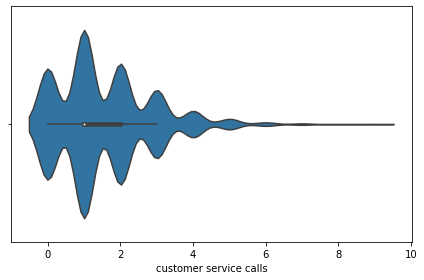

In [23]:
for i in ['account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']:
    sns.violinplot(x=i,data=df_churn)
    plt.tight_layout()
    plt.show()

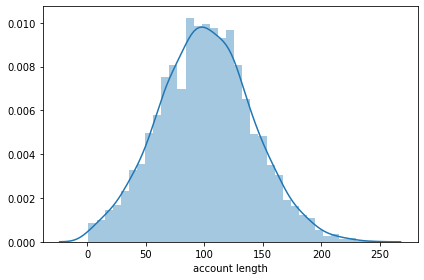

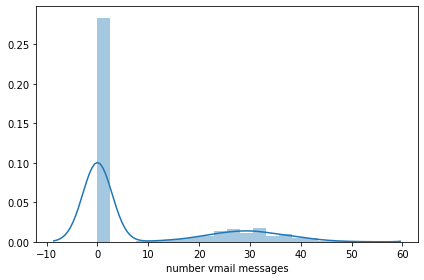

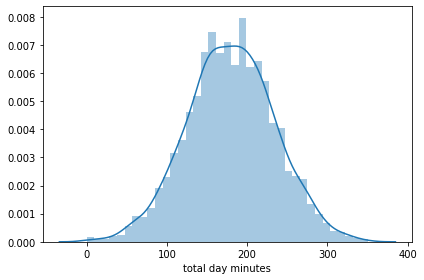

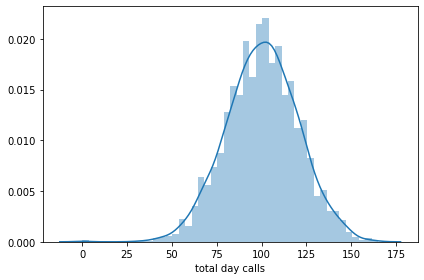

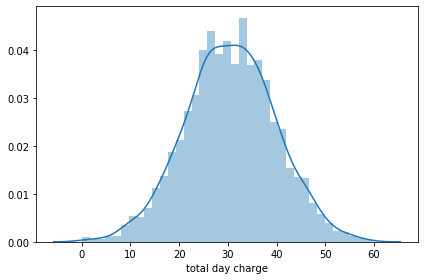

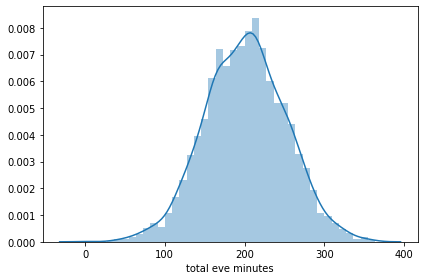

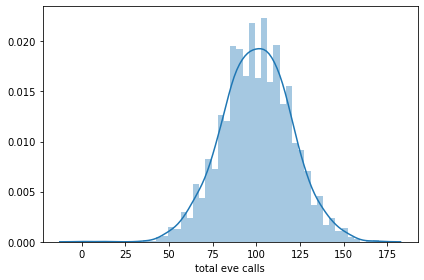

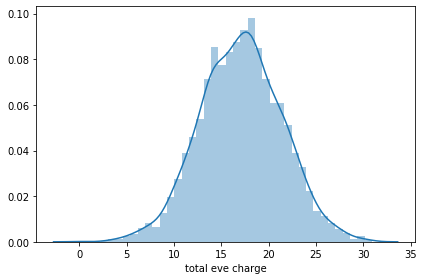

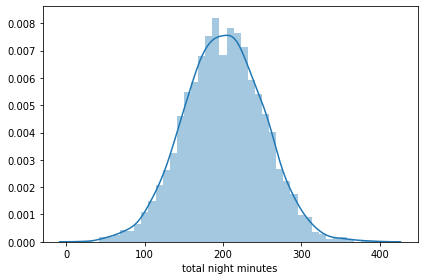

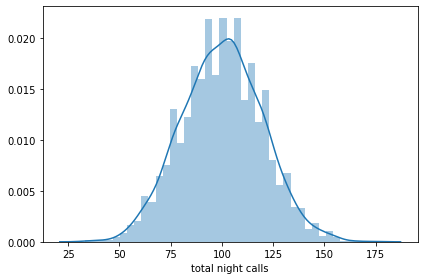

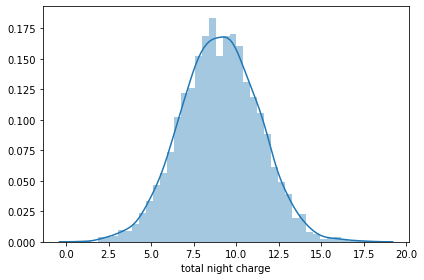

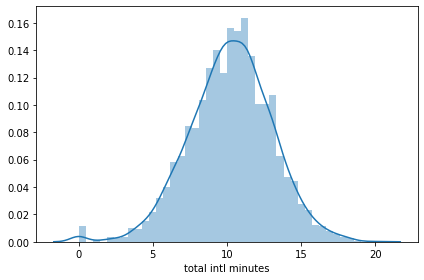

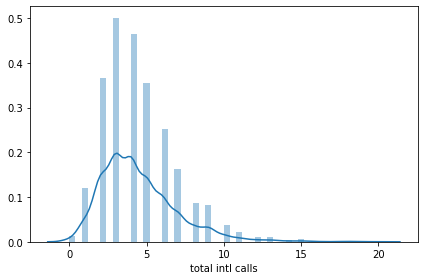

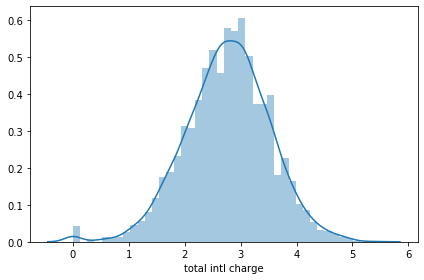

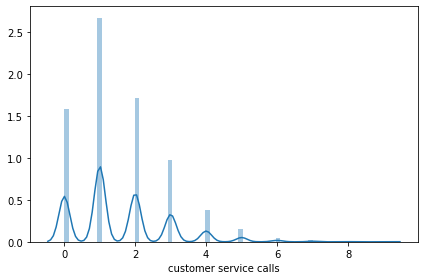

In [24]:
#Checking for the distribution of the data
for i in ['account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']:
    sns.distplot(df_churn[i],bins='auto')
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

In [25]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_churn['churn']=le.fit_transform(df_churn['churn'])

In [28]:
df_churn['churn'].dtype

dtype('int64')

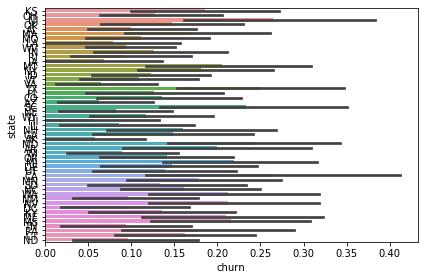

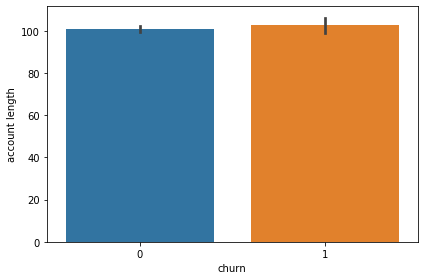

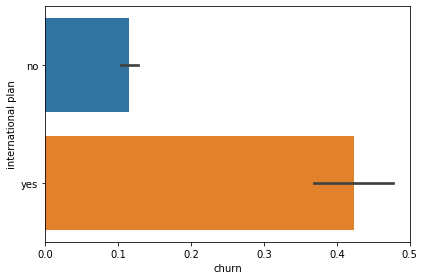

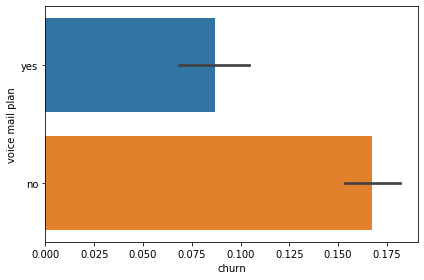

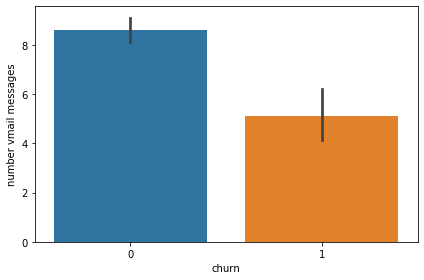

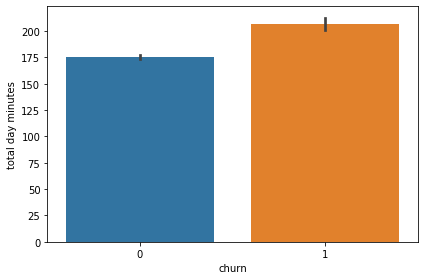

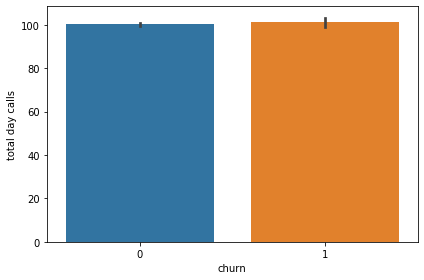

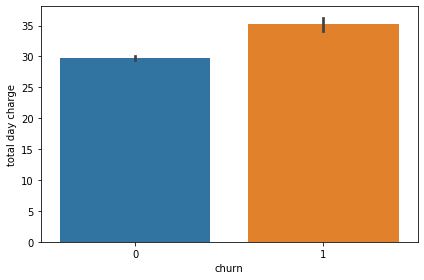

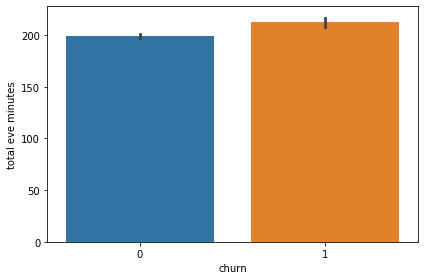

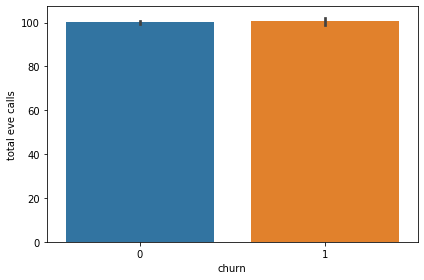

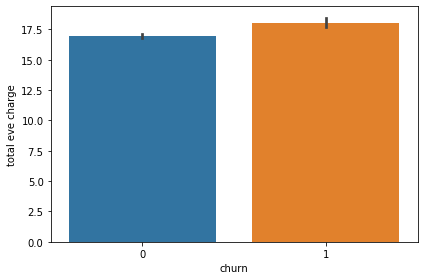

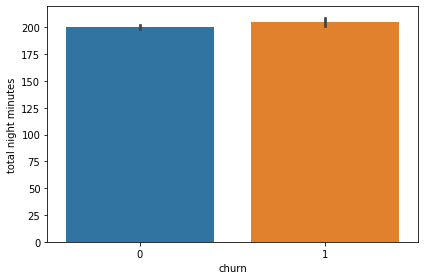

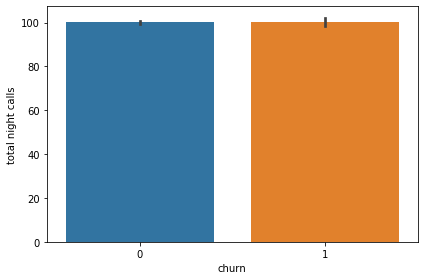

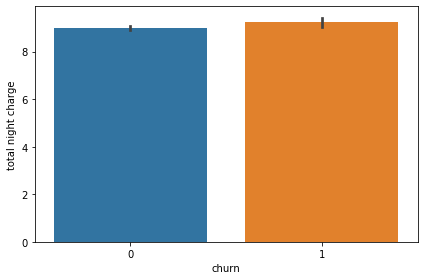

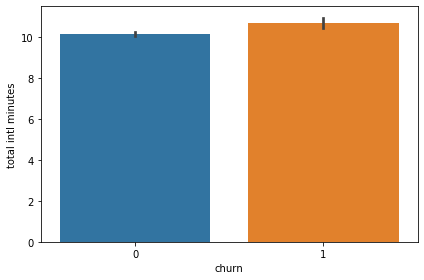

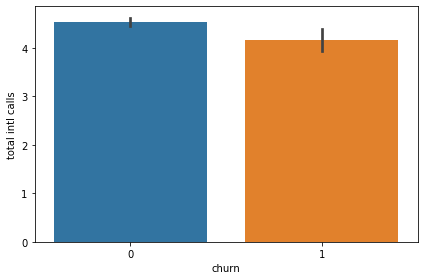

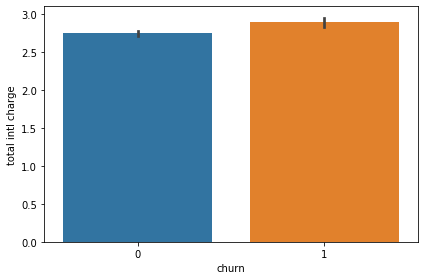

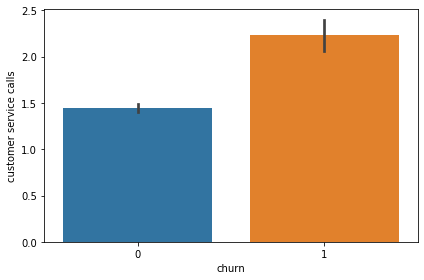

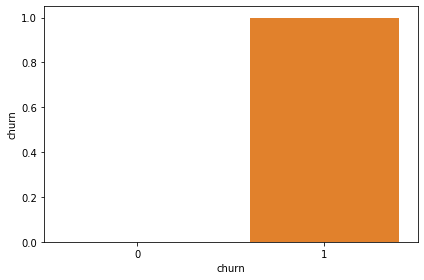

In [34]:
for i in df_churn.columns:
    sns.barplot(df_churn['churn'],df_churn[i])
    plt.tight_layout()
    plt.show()

In [35]:
#Checking the correlation between the attributes
df_churn.corr()

account length  number vmail messages  \
account length                1.000000              -0.004628   
number vmail messages        -0.004628               1.000000   
total day minutes             0.006216               0.000778   
total day calls               0.038470              -0.009548   
total day charge              0.006214               0.000776   
total eve minutes            -0.006757               0.017562   
total eve calls               0.019260              -0.005864   
total eve charge             -0.006745               0.017578   
total night minutes          -0.008955               0.007681   
total night calls            -0.013176               0.007123   
total night charge           -0.008960               0.007663   
total intl minutes            0.009514               0.002856   
total intl calls              0.020661               0.013957   
total intl charge             0.009546               0.002884   
customer service calls       -0.003796              -0.013263   
churn                         0.016541              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl charge               -0.011067         0.008674         -0.011074   
customer service calls          -0.012985         0.002423         -0.012987   
churn                            0.092796         0.009233          0.092786   

                        total night minutes  total night calls  \
account length                    -0.008955          -0.013176   
number vmail messages              0.007681           0.007123  

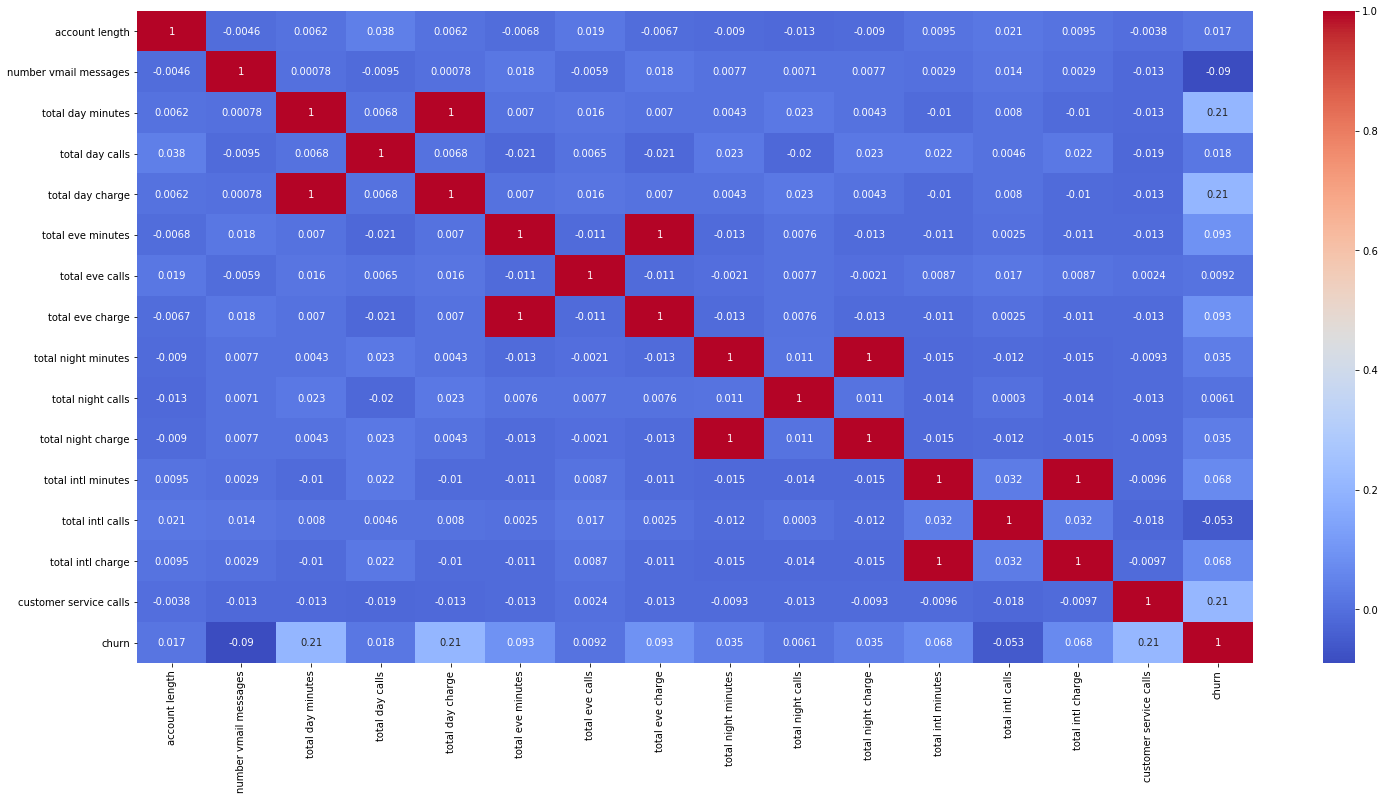

In [36]:
plt.figure(figsize=(25,12))
sns.heatmap(df_churn.corr(),cmap='coolwarm',annot=True)
plt.show()

# Multivariate Analysis

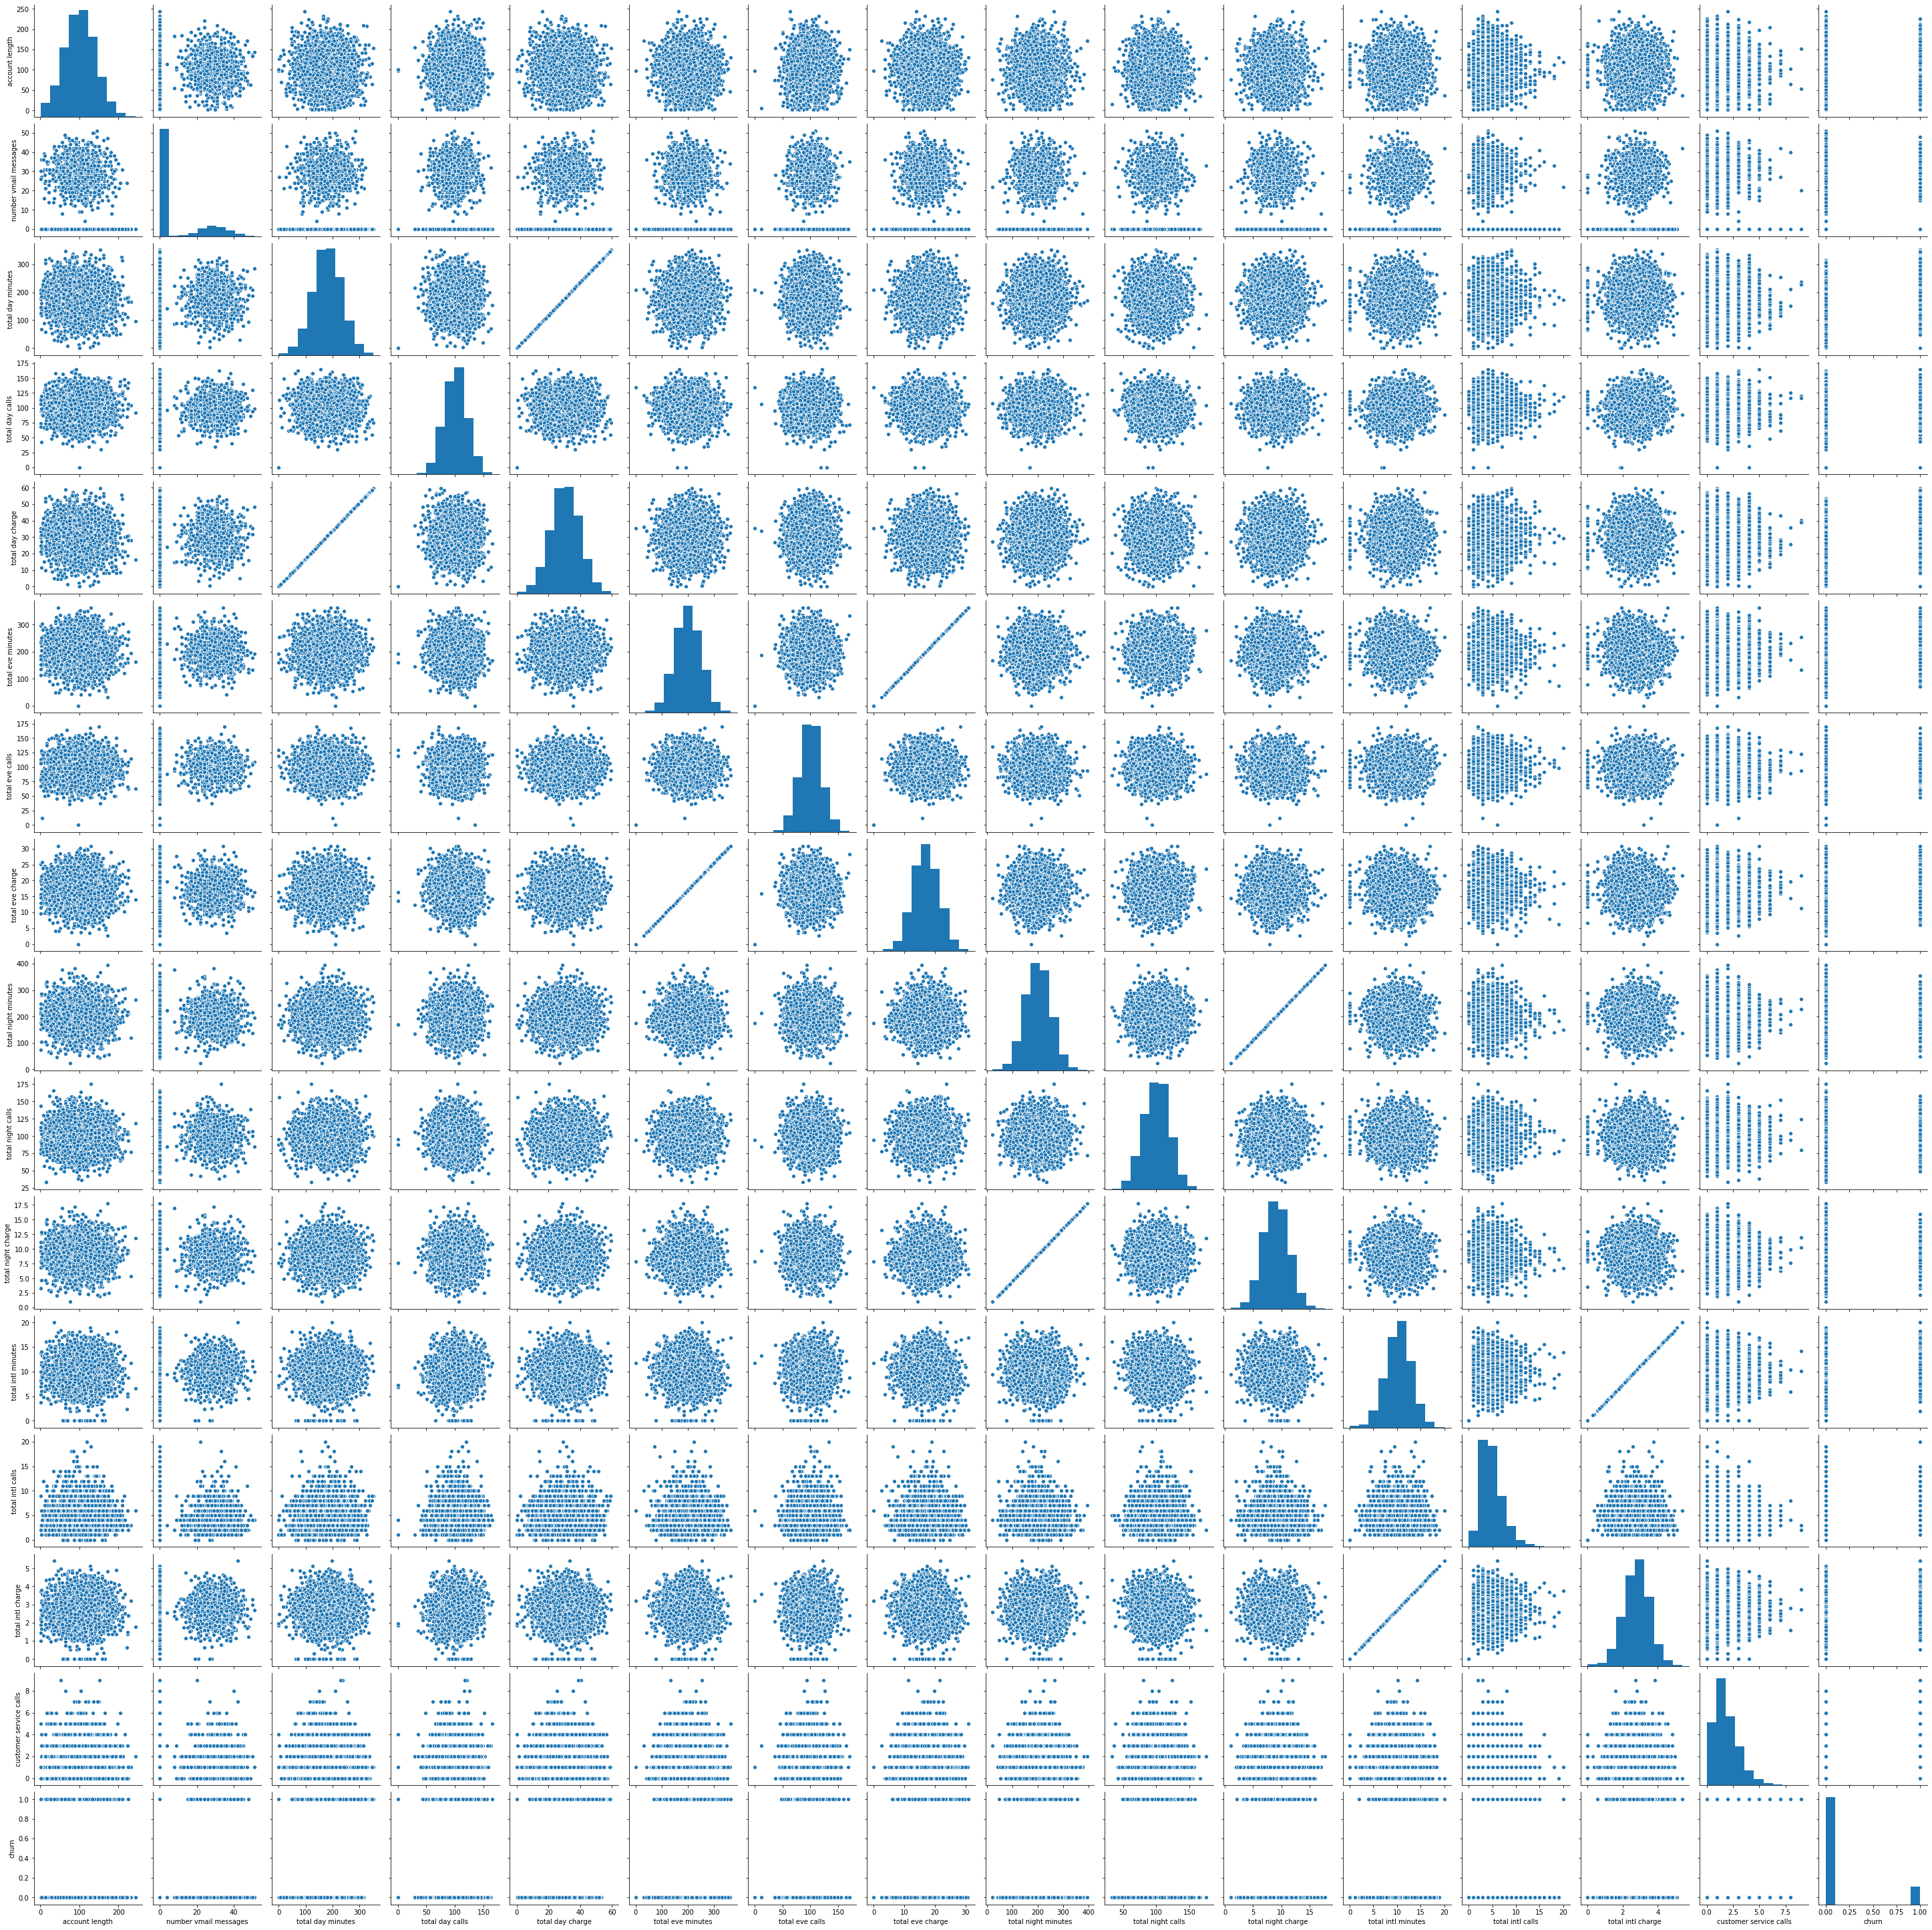

In [37]:
sns.pairplot(df_churn)

In [38]:
df_churn.drop(['total day minutes','total eve minutes','total night minutes','total intl minutes'],axis=1,inplace=True)
#total day minutes,total day charge|total eve minutes,total eve charge|total night minutes,total night charge
#total intl minutes,total intl charge have same correlation so, one set is dropped

In [39]:
df_churn.skew()

account length            0.096606
number vmail messages     1.264824
total day calls          -0.111787
total day charge         -0.029083
total eve calls          -0.055563
total eve charge         -0.023858
total night calls         0.032500
total night charge        0.008886
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [41]:
#removing skewness using log transform
for col in ['account length','number vmail messages','total day calls', 'total day charge','total eve calls',
'total eve charge','total night calls', 'total night charge','total intl calls', 'total intl charge',
'customer service calls'] :
    if df_churn.skew().loc[col]>0.55:
        df_churn[col]=np.log1p(df_churn[col])

In [42]:
df_churn.skew()
#reduced skewness

account length            0.096606
number vmail messages     1.028178
total day calls          -0.111787
total day charge         -0.029083
total eve calls          -0.055563
total eve charge         -0.023858
total night calls         0.032500
total night charge        0.008886
total intl calls         -0.199368
total intl charge        -0.245287
customer service calls   -0.138568
churn                     2.018356
dtype: float64

In [43]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_churn[['account length','number vmail messages','total day calls', 'total day charge','total eve calls',
'total eve charge','total night calls', 'total night charge','total intl calls', 'total intl charge',
'customer service calls']]))
print(zscore)
print(np.where(zscore>3))
df_churn_new=df_churn[(zscore<3).all(axis=1)]

[[0.67648946 1.5323774  0.47664315 ... 0.49853544 0.0856905  0.22682722]
 [0.14906505 1.55725778 1.12450284 ... 0.49853544 1.2411686  0.22682722]
 [0.9025285  0.61552855 0.67598459 ... 0.42112115 0.69715637 1.5607056 ]
 ...
 [1.83505538 0.61552855 0.42680779 ... 0.77075836 1.3871231  0.55344162]
 [2.08295458 0.61552855 0.22746635 ... 1.79592943 1.87695028 0.55344162]
 [0.67974475 1.5323774  0.62614923 ... 0.00758811 1.2411686  1.5607056 ]]
(array([  22,   32,   58,  115,  179,  179,  244,  301,  314,  343,  343,
        365,  377,  416,  468,  488,  488,  493,  533,  595,  595,  646,
        692,  712,  712,  740,  762,  817,  821,  878,  878,  883,  889,
        922,  960,  982,  985, 1028, 1028, 1052, 1080, 1080, 1113, 1121,
       1144, 1233, 1260, 1317, 1345, 1345, 1397, 1397, 1400, 1400, 1408,
       1445, 1551, 1564, 1564, 1615, 1751, 1886, 1986, 1989, 2288, 2321,
       2331, 2345, 2345, 2362, 2362, 2513, 2513, 2551, 2594, 2659, 2663,
       2669, 2732, 2733, 2733, 2736, 2753, 2

In [44]:
print('Before removing outliers:',df_churn.shape)
print('After removing outliers:',df_churn_new.shape)

Before removing outliers: (3333, 15)
After removing outliers: (3251, 15)


In [51]:
for i in df_churn.columns:
    print(df_churn[i].value_counts())

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
NV     66
WA     66
CO     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64
no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64
0.000000    2411
3.465736      60
3.401197      53
3.367296      51
3.526361      46
3.433987      44
3.332205      44
3.218876      42
3.496508      41
3.295837      41
3.258097     

In [53]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_churn_new['state']=le.fit_transform(df_churn_new['state'])

In [54]:
df_churn_final=pd.get_dummies(df_churn_new)

In [55]:
df_churn_final

state  account length  number vmail messages  total day calls  \
0        16             128               3.258097              110   
1        35             107               3.295837              123   
2        31             137               0.000000              114   
3        35              84               0.000000               71   
4        36              75               0.000000              113   
...     ...             ...                    ...              ...   
3328      3             192               3.610918               77   
3329     49              68               0.000000               57   
3330     39              28               0.000000              109   
3331      6             184               0.000000              105   
3332     42              74               3.258097              113   

      total day charge  total eve calls  total eve charge  total night calls  \
0                45.07               99             16.78                 91   
1                27.47              103             16.62                103   
2                41.38              110             10.30                104   
3                50.90               88              5.26                 89   
4                28.34              122             12.61                121   
...                ...              ...               ...                ...   
3328             26.55              126             18.32                 83   
3329             39.29               55             13.04                123   
3330             30.74               58             24.55                 91   
3331             36.35               84             13.57                137   
3332             39.85               82             22.60                 77   

      total night charge  total intl calls  total intl charge  \
0                  11.01          1.386294               2.70   
1                  11.45          1.386294               3.70   
2                   7.32          1.791759               3.29   
3                   8.86          2.079442               1.78   
4                   8.41          1.386294               2.73   
...                  ...               ...                ...   
3328               12.56          1.945910               2.67   
3329                8.61          1.609438               2.59   
3330                8.64          1.945910               3.81   
3331                6.26          2.397895               1.35   
3332               10.86          1.609438               3.70   

      customer service calls  churn  international plan_no  \
0                   0.693147      0                      1   
1                   0.693147      0                      1   
2                   0.000000      0                      1   
3                   1.098612      0                      0   
4                   1.386294      0                      0   
...                      ...    ...                    ...   
3328                1.098612      0                      1   
3329                1.386294      0                      1   
3330                1.098612      0                      1   
3331                1.098612      0                      0   
3332                0.000000      0                      1   

      international plan_yes  voice mail plan_no  voice mail plan_yes  
0                          0                   0                    1  
1                          0                   0                    1  
2                          0                   1                    0  
3                          1                   1                    0  
4                          1                   1                    0  
...                      ...                 ...                  ...  
3328                       0                   0                    1  
3329                       0                   1                    0  
3330              

In [56]:
#separating into input and output variables
df_x=df_churn_final.drop(columns=['churn'])
y=pd.DataFrame(df_churn_final['churn'])

In [57]:
df_x.shape

(3251, 16)

In [58]:
y.shape

(3251, 1)

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [60]:
x

state  account length  number vmail messages  total day calls  \
0    -0.676240        0.689293               1.530941         0.478996   
1     0.606249        0.157309               1.555809         1.138254   
2     0.336252        0.917285              -0.615879         0.681845   
3     0.606249       -0.425339              -0.615879        -1.498776   
4     0.673749       -0.653331              -0.615879         0.631133   
...        ...             ...                    ...              ...   
3246 -1.553733        2.310574               1.763422        -1.194504   
3247  1.551242       -0.830659              -0.615879        -2.208746   
3248  0.876247       -1.843960              -0.615879         0.428284   
3249 -1.351235        2.107914              -0.615879         0.225436   
3250  1.078746       -0.678664               1.530941         0.631133   

      total day charge  total eve calls  total eve charge  total night calls  \
0             1.577970        -0.061150         -0.071718          -0.467493   
1            -0.344921         0.142694         -0.109371           0.151284   
2             1.174818         0.499421         -1.596653           0.202849   
3             2.214927        -0.621721         -2.782714          -0.570622   
4            -0.249869         1.110953         -1.053042           1.079449   
...                ...              ...               ...                ...   
3246         -0.445435         1.314797          0.290690          -0.880010   
3247          0.946475        -2.303434         -0.951850           1.182578   
3248          0.012344        -2.150551          1.756793          -0.467493   
3249          0.625265        -0.825565         -0.827126           1.904484   
3250          1.007658        -0.927487          1.297900          -1.189399   

      total night charge  total intl calls  total intl charge  \
0               0.882443         -0.537163          -0.114048   
1               1.078711         -0.537163           1.274401   
2              -0.763527          0.423104           0.705137   
3              -0.076591          1.104424          -1.391422   
4              -0.277319         -0.537163          -0.072395   
...                  ...               ...                ...   
3246            1.573840          0.788180          -0.155702   
3247           -0.188106         -0.008690          -0.266778   
3248           -0.174724          0.788180           1.427131   
3249           -1.236353          1.858621          -1.988456   
3250            0.815534         -0.008690           1.274401   

      customer service calls  international plan_no  international plan_yes  \
0                  -0.226047               0.327550               -0.327550   
1                  -0.226047               0.327550               -0.327550   
2                  -1.558849               0.327550               -0.327550   
3                   0.553593              -3.052971                3.052971   
4                   1.106755              -3.052971                3.052971   
...                      ...                    ...                     ...   
3246                0.553593               0.327550               -0.327550   
3247                1.106755               0.327550               -0.327550   
3248                0.553593               0.327550               -0.327550   
3249                0.553593              -3.052971                3.052971   
3250               -1.558849               0.327550               -0.327550   

      voice mail plan_no  voice mail plan_yes  
0              -1.616237             1.616237  
1              -1.616237             1.616237  
2               0.618721            -0.618721  
3               0.618721            -0.618721  
4               0.618721            -0.618721  
...                  ...                  ...  
3246           -1.616237             1.616237  
3247            0.618721            -0.618721

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB                                                                                                                   
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [62]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.847926267281106
confusion matrix corresponding to random state: 42 is: [[537  13]
 [ 86  15]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.86      0.98      0.92       550
           1       0.54      0.15      0.23       101

    accuracy                           0.85       651
   macro avg       0.70      0.56      0.57       651
weighted avg       0.81      0.85      0.81       651


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 43 is: 0.9400921658986175
confusion matrix corresponding to random state: 43 is: [[546   5]
 [ 34  66]]
classification report corresponding to random state: 43 is:               precision    recall  f1-score   support

           0       0.94      0.99      0.97       551
           1       0.93      0.66      0.77       100

    accuracy                           0.94       651
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 45 is: 0.890937019969278
confusion matrix corresponding to random state: 45 is: [[554   4]
 [ 67  26]]
classification report corresponding to random state: 45 is:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       558
           1       0.87      0.28      0.42        93

    accuracy                           0.89       651
   macro avg       0.88      0.64      0.68       651
weighted avg       0.89      0.89      0.87       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 45 is: 0.8463901689708141
confusion matrix corresponding to random state: 45 is: [[517  41]
 [ 59  34]]
classification report corresponding t

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 47 is: 0.9047619047619048
confusion matrix corresponding to random state: 47 is: [[550  10]
 [ 52  39]]
classification report corresponding to random state: 47 is:               precision    recall  f1-score   support

           0       0.91      0.98      0.95       560
           1       0.80      0.43      0.56        91

    accuracy                           0.90       651
   macro avg       0.85      0.71      0.75       651
weighted avg       0.90      0.90      0.89       651


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 48 is: 0.9431643625192012
confusion matrix corresponding to random state: 48 is: [[555   7]
 [ 30  59]]
classification report corresponding to random state: 48 is:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       562
           1       0.89      0.66      0.76        89

    accuracy                           0.94       651
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 50 is: 0.8832565284178188
confusion matrix corresponding to random state: 50 is: [[548   9]
 [ 67  27]]
classification report corresponding to random state: 50 is:               precision    recall  f1-score   support

           0       0.89      0.98      0.94       557
           1       0.75      0.29      0.42        94

    accuracy                           0.88       651
   macro avg       0.82      0.64      0.68       651
weighted avg       0.87      0.88      0.86       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 50 is: 0.8402457757296466
confusion matrix corresponding to random state: 50 is: [[516  41]
 [ 63  31]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 52 is: 0.9109062980030722
confusion matrix corresponding to random state: 52 is: [[565   6]
 [ 52  28]]
classification report corresponding to random state: 52 is:               precision    recall  f1-score   support

           0       0.92      0.99      0.95       571
           1       0.82      0.35      0.49        80

    accuracy                           0.91       651
   macro avg       0.87      0.67      0.72       651
weighted avg       0.90      0.91      0.89       651


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 53 is: 0.9416282642089093
confusion matrix corresponding to random state: 53 is: [[558   6]
 [ 32  55]]
classification report corresponding to random state: 53 is:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       564
           1       0.90      0.63      0.74        87

    accuracy                           0.94       651
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 55 is: 0.8894009216589862
confusion matrix corresponding to random state: 55 is: [[554   1]
 [ 71  25]]
classification report corresponding to random state: 55 is:               precision    recall  f1-score   support

           0       0.89      1.00      0.94       555
           1       0.96      0.26      0.41        96

    accuracy                           0.89       651
   macro avg       0.92      0.63      0.67       651
weighted avg       0.90      0.89      0.86       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 55 is: 0.8402457757296466
confusion matrix corresponding to random state: 55 is: [[524  31]
 [ 73  23]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 57 is: 0.9262672811059908
confusion matrix corresponding to random state: 57 is: [[554   9]
 [ 39  49]]
classification report corresponding to random state: 57 is:               precision    recall  f1-score   support

           0       0.93      0.98      0.96       563
           1       0.84      0.56      0.67        88

    accuracy                           0.93       651
   macro avg       0.89      0.77      0.81       651
weighted avg       0.92      0.93      0.92       651


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 58 is: 0.9308755760368663
confusion matrix corresponding to random state: 58 is: [[550   6]
 [ 39  56]]
classification report corresponding to random state: 58 is:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       556
           1       0.90      0.59      0.71        95

    accuracy                           0.93       651
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 60 is: 0.8663594470046083
confusion matrix corresponding to random state: 60 is: [[540   6]
 [ 81  24]]
classification report corresponding to random state: 60 is:               precision    recall  f1-score   support

           0       0.87      0.99      0.93       546
           1       0.80      0.23      0.36       105

    accuracy                           0.87       651
   macro avg       0.83      0.61      0.64       651
weighted avg       0.86      0.87      0.83       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 60 is: 0.8417818740399385
confusion matrix corresponding to random state: 60 is: [[513  33]
 [ 70  35]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 62 is: 0.8878648233486943
confusion matrix corresponding to random state: 62 is: [[542   7]
 [ 66  36]]
classification report corresponding to random state: 62 is:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       549
           1       0.84      0.35      0.50       102

    accuracy                           0.89       651
   macro avg       0.86      0.67      0.72       651
weighted avg       0.88      0.89      0.87       651


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 63 is: 0.9400921658986175
confusion matrix corresponding to random state: 63 is: [[545   8]
 [ 31  67]]
classification report corresponding to random state: 63 is:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       553
           1       0.89      0.68      0.77        98

    accuracy                           0.94       651
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 65 is: 0.8832565284178188
confusion matrix corresponding to random state: 65 is: [[555   6]
 [ 70  20]]
classification report corresponding to random state: 65 is:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       561
           1       0.77      0.22      0.34        90

    accuracy                           0.88       651
   macro avg       0.83      0.61      0.64       651
weighted avg       0.87      0.88      0.85       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 65 is: 0.8433179723502304
confusion matrix corresponding to random state: 65 is: [[523  38]
 [ 64  26]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 67 is: 0.9155145929339478
confusion matrix corresponding to random state: 67 is: [[556   1]
 [ 54  40]]
classification report corresponding to random state: 67 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95       557
           1       0.98      0.43      0.59        94

    accuracy                           0.92       651
   macro avg       0.94      0.71      0.77       651
weighted avg       0.92      0.92      0.90       651


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 68 is: 0.946236559139785
confusion matrix corresponding to random state: 68 is: [[541   5]
 [ 30  75]]
classification report corresponding to random state: 68 is:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       546
           1       0.94      0.71      0.81       105

    accuracy                           0.95       651
   m

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 70 is: 0.8602150537634409
confusion matrix corresponding to random state: 70 is: [[532   6]
 [ 85  28]]
classification report corresponding to random state: 70 is:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       538
           1       0.82      0.25      0.38       113

    accuracy                           0.86       651
   macro avg       0.84      0.62      0.65       651
weighted avg       0.86      0.86      0.83       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 70 is: 0.8341013824884793
confusion matrix corresponding to random state: 70 is: [[508  30]
 [ 78  35]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 72 is: 0.9231950844854071
confusion matrix corresponding to random state: 72 is: [[558   1]
 [ 49  43]]
classification report corresponding to random state: 72 is:               precision    recall  f1-score   support

           0       0.92      1.00      0.96       559
           1       0.98      0.47      0.63        92

    accuracy                           0.92       651
   macro avg       0.95      0.73      0.79       651
weighted avg       0.93      0.92      0.91       651


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 73 is: 0.9554531490015361
confusion matrix corresponding to random state: 73 is: [[547   3]
 [ 26  75]]
classification report corresponding to random state: 73 is:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       550
           1       0.96      0.74      0.84       101

    accuracy                           0.96       651
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 75 is: 0.8771121351766513
confusion matrix corresponding to random state: 75 is: [[547   6]
 [ 74  24]]
classification report corresponding to random state: 75 is:               precision    recall  f1-score   support

           0       0.88      0.99      0.93       553
           1       0.80      0.24      0.38        98

    accuracy                           0.88       651
   macro avg       0.84      0.62      0.65       651
weighted avg       0.87      0.88      0.85       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 75 is: 0.847926267281106
confusion matrix corresponding to random state: 75 is: [[521  32]
 [ 67  31]]
classification report corresponding t

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 77 is: 0.9278033794162827
confusion matrix corresponding to random state: 77 is: [[554   6]
 [ 41  50]]
classification report corresponding to random state: 77 is:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       560
           1       0.89      0.55      0.68        91

    accuracy                           0.93       651
   macro avg       0.91      0.77      0.82       651
weighted avg       0.93      0.93      0.92       651


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 78 is: 0.9370199692780338
confusion matrix corresponding to random state: 78 is: [[539   7]
 [ 34  71]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           0       0.94      0.99      0.96       546
           1       0.91      0.68      0.78       105

    accuracy                           0.94       651
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 80 is: 0.8817204301075269
confusion matrix corresponding to random state: 80 is: [[549   6]
 [ 71  25]]
classification report corresponding to random state: 80 is:               precision    recall  f1-score   support

           0       0.89      0.99      0.93       555
           1       0.81      0.26      0.39        96

    accuracy                           0.88       651
   macro avg       0.85      0.62      0.66       651
weighted avg       0.87      0.88      0.85       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 80 is: 0.8433179723502304
confusion matrix corresponding to random state: 80 is: [[517  38]
 [ 64  32]]
classification report corresponding 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 82 is: 0.9155145929339478
confusion matrix corresponding to random state: 82 is: [[559   4]
 [ 51  37]]
classification report corresponding to random state: 82 is:               precision    recall  f1-score   support

           0       0.92      0.99      0.95       563
           1       0.90      0.42      0.57        88

    accuracy                           0.92       651
   macro avg       0.91      0.71      0.76       651
weighted avg       0.91      0.92      0.90       651


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 83 is: 0.956989247311828
confusion matrix corresponding to random state: 83 is: [[555   6]
 [ 22  68]]
classification report corresponding to random state: 83 is:               precision    recall  f1-score   support

           0       0.96      0.99      0.98       561
           1       0.92      0.76      0.83        90

    accuracy                           0.96       651
   m

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 85 is: 0.8740399385560675
confusion matrix corresponding to random state: 85 is: [[549  11]
 [ 71  20]]
classification report corresponding to random state: 85 is:               precision    recall  f1-score   support

           0       0.89      0.98      0.93       560
           1       0.65      0.22      0.33        91

    accuracy                           0.87       651
   macro avg       0.77      0.60      0.63       651
weighted avg       0.85      0.87      0.85       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 85 is: 0.82642089093702
confusion matrix corresponding to random state: 85 is: [[519  41]
 [ 72  19]]
classification report corresponding to

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 87 is: 0.9231950844854071
confusion matrix corresponding to random state: 87 is: [[564   4]
 [ 46  37]]
classification report corresponding to random state: 87 is:               precision    recall  f1-score   support

           0       0.92      0.99      0.96       568
           1       0.90      0.45      0.60        83

    accuracy                           0.92       651
   macro avg       0.91      0.72      0.78       651
weighted avg       0.92      0.92      0.91       651


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
accuracy score corresponding to random state: 88 is: 0.9477726574500768
confusion matrix corresponding to random state: 88 is: [[551   5]
 [ 29  66]]
classification report corresponding to random state: 88 is:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       556
           1       0.93      0.69      0.80        95

    accuracy                           0.95       651
   

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 90 is: 0.8755760368663594
confusion matrix corresponding to random state: 90 is: [[543   8]
 [ 73  27]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.88      0.99      0.93       551
           1       0.77      0.27      0.40       100

    accuracy                           0.88       651
   macro avg       0.83      0.63      0.67       651
weighted avg       0.86      0.88      0.85       651


accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 90 is: 0.8417818740399385
confusion matrix corresponding to random state: 90 is: [[518  33]
 [ 70  30]]
classification report corresponding 

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 92 is: 0.8940092165898618
confusion matrix corresponding to random state: 92 is: [[524  34]
 [ 35  58]]
classification report corresponding to random state: 92 is:               precision    recall  f1-score   support

           0       0.94      0.94      0.94       558
           1       0.63      0.62      0.63        93

    accuracy                           0.89       651
   macro avg       0.78      0.78      0.78       651
weighted avg       0.89      0.89      0.89       651


accuracy scor

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 94 is: 0.9062980030721967
confusion matrix corresponding to random state: 94 is: [[520  36]
 [ 25  70]]
classification report corresponding to random state: 94 is:               precision    recall  f1-score   support

           0       0.95      0.94      0.94       556
           1       0.66      0.74      0.70        95

    accuracy                           0.91       651
   macro avg       0.81      0.84      0.82       651
weighted avg       0.91      0.91      0.91       651


accuracy scor

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 96 is: 0.9185867895545314
confusion matrix corresponding to random state: 96 is: [[533  35]
 [ 18  65]]
classification report corresponding to random state: 96 is:               precision    recall  f1-score   support

           0       0.97      0.94      0.95       568
           1       0.65      0.78      0.71        83

    accuracy                           0.92       651
   macro avg       0.81      0.86      0.83       651
weighted avg       0.93      0.92      0.92       651


accuracy scor

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 98 is: 0.901689708141321
confusion matrix corresponding to random state: 98 is: [[509  37]
 [ 27  78]]
classification report corresponding to random state: 98 is:               precision    recall  f1-score   support

           0       0.95      0.93      0.94       546
           1       0.68      0.74      0.71       105

    accuracy                           0.90       651
   macro avg       0.81      0.84      0.82       651
weighted avg       0.91      0.90      0.90       651


accuracy score

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 100 is: 0.901689708141321
confusion matrix corresponding to random state: 100 is: [[523  35]
 [ 29  64]]
classification report corresponding to random state: 100 is:               precision    recall  f1-score   support

           0       0.95      0.94      0.94       558
           1       0.65      0.69      0.67        93

    accuracy                           0.90       651
   macro avg       0.80      0.81      0.80       651
weighted avg       0.90      0.90      0.90       651


accuracy sc

In [63]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr,'and model is',final_model)

Max accuracy Score corresponding to random state 51 is 0.9662058371735791 and model is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [64]:
LR=LogisticRegression()
SV=SVC()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()

In [65]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

*********** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.8540706605222734


roc_auc_score= 0.5519713261648744


classification_report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       558
           1       0.46      0.13      0.20        93

    accuracy                           0.85       651
   macro avg       0.67      0.55      0.56       651
weighted avg       0.81      0.85      0.82       651



[[544  14]
 [ 81  12]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ***********


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shap

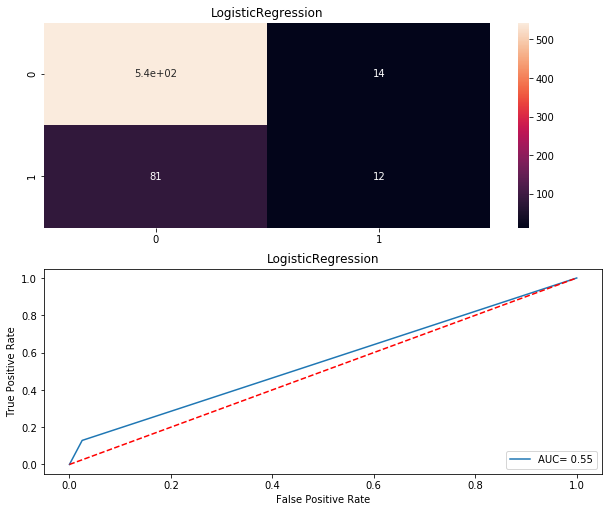

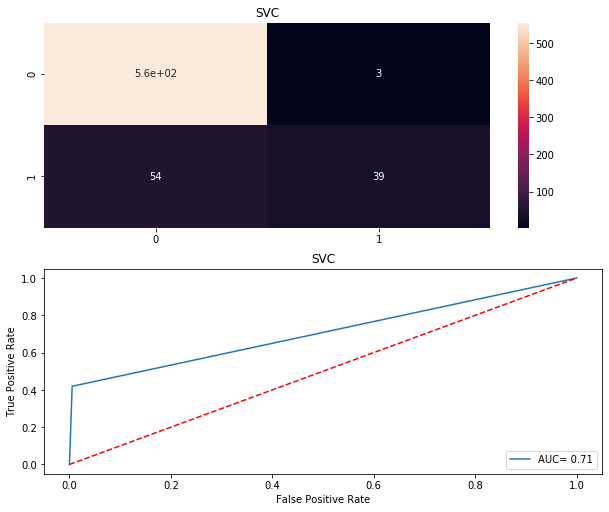

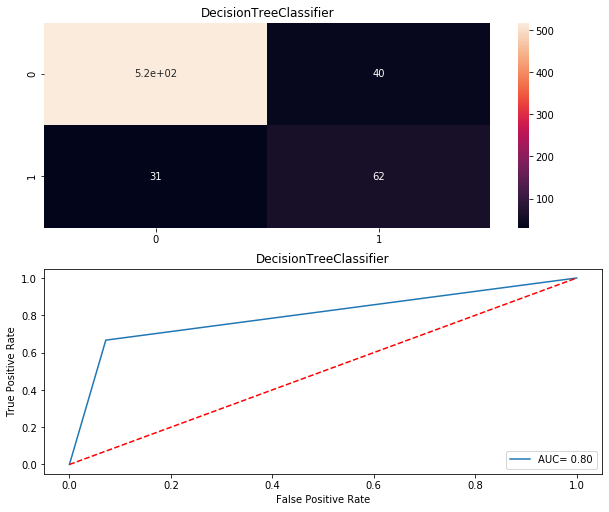

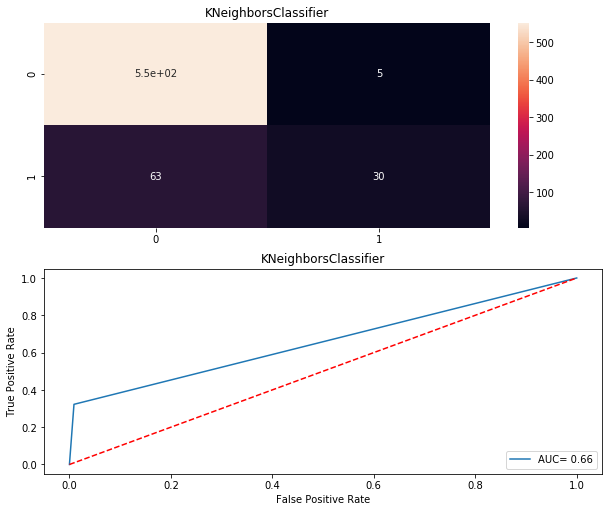

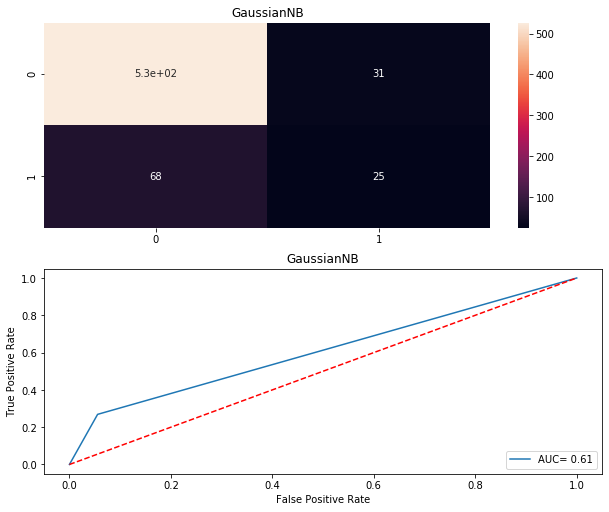

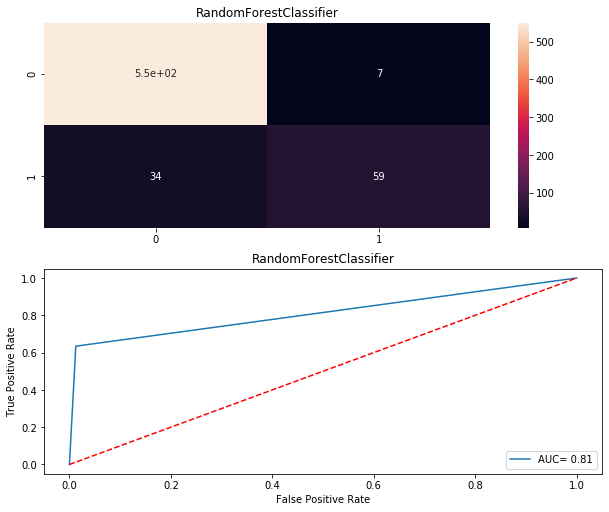

In [66]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("Accuracy_score=",AS)
    score.append(AS*100)
    print('\n')
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,pre) #
    roc_auc= auc(false_positive_rate,true_positive_rate) #
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')   

In [67]:
import sklearn
from sklearn.model_selection import cross_val_score
score=cross_val_score(sklearn.ensemble.RandomForestClassifier(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.95391705 0.93692308 0.96307692 0.94769231 0.95076923]
0.9504757178305565
0.008510472876745074


In [68]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [69]:
#Using cross val score to check the mean score and standard deviation
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)
print("Mean score for Gradient Boosting Classifier:",cross_val_score(gbc,x,y,cv=5).mean())
print('Standard Deviation in score for Gradient Boosting Classifier:',cross_val_score(gbc,x,y,cv=5).std())

Mean score for Gradient Boosting Classifier: 0.9547843554295168
Standard Deviation in score for Gradient Boosting Classifier: 0.004403655731575985


In [72]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.9631336405529954
confusion matrix corresponding to random state: 42 is: [[544   6]
 [ 18  83]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 49 is: 0.9354838709677419
confusion matrix corresponding to random state: 49 is: [[545   6]
 [ 36  64]]
classification report corresponding to random state: 49 is:               precision    recall  f1-score   support

           0    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 56 is: 0.9554531490015361
confusion matrix corresponding to random state: 56 is: [[556  10]
 [ 19  66]]
classification report corresponding to random state: 56 is:               precision    recall  f1-score   support

           0    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 63 is: 0.9354838709677419
confusion matrix corresponding to random state: 63 is: [[538  15]
 [ 27  71]]
classification report corresponding to random state: 63 is:               precision    recall  f1-score   support

           0    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 70 is: 0.9370199692780338
confusion matrix corresponding to random state: 70 is: [[530   8]
 [ 33  80]]
classification report corresponding to random state: 70 is:               precision    recall  f1-score   support

           0    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 77 is: 0.9493087557603687
confusion matrix corresponding to random state: 77 is: [[551   9]
 [ 24  67]]
classification report corresponding to random state: 77 is:               precision    recall  f1-score   support

           0    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 84 is: 0.956989247311828
confusion matrix corresponding to random state: 84 is: [[545   3]
 [ 25  78]]
classification report corresponding to random state: 84 is:               precision    recall  f1-score   support

           0     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 91 is: 0.9508448540706606
confusion matrix corresponding to random state: 91 is: [[541   9]
 [ 23  78]]
classification report corresponding to random state: 91 is:               precision    recall  f1-score   support

           0    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 98 is: 0.9385560675883257
confusion matrix corresponding to random state: 98 is: [[534  12]
 [ 28  77]]
classification report corresponding to random state: 98 is:               precision    recall  f1-score   support

           0    

In [73]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr)

Max accuracy Score corresponding to random state 69 is 0.9708141321044547


In [74]:
#We tried all methods and till now GradientBoostingClassifier is the best option 
#Random state corresponding to highest r2 score is 56
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69,test_size=0.20)
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print("Mean score for Gradient Boosting Classifier:",cross_val_score(gbc,x,y,cv=5).mean())
print('Standard Deviation in score for Gradient Boosting Classifier:',cross_val_score(gbc,x,y,cv=5).std())

Mean score for Gradient Boosting Classifier: 0.955092047737209
Standard Deviation in score for Gradient Boosting Classifier: 0.003949163717860829


In [75]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(gbc,"Project15_Churn.pkl")

['Project15_Churn.pkl']